<a href="https://colab.research.google.com/github/santiagonajera/ArbolDecision-EntregasTiempo/blob/main/ArbolesDecision_Entregas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos cargados exitosamente.


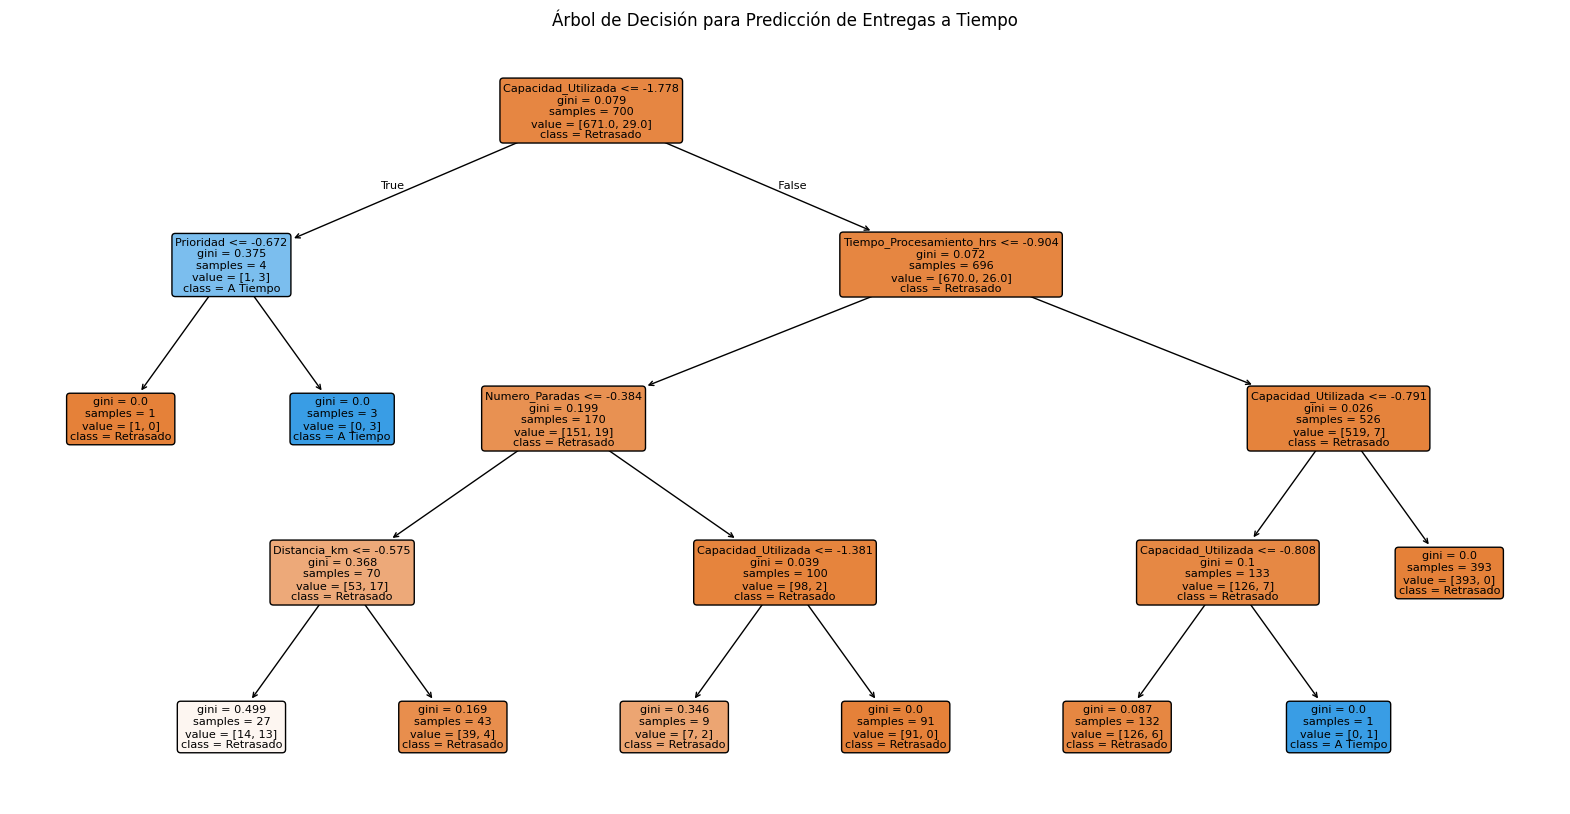

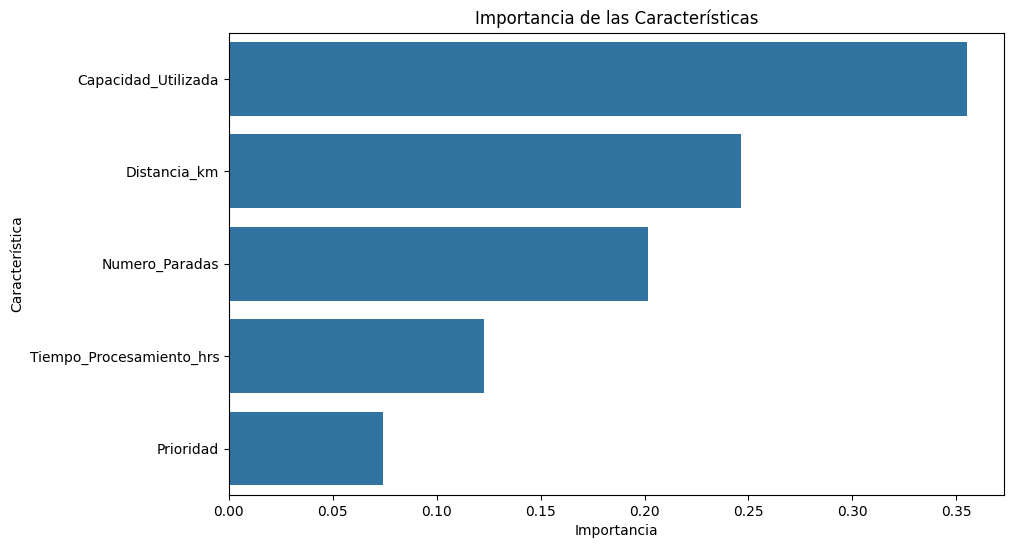

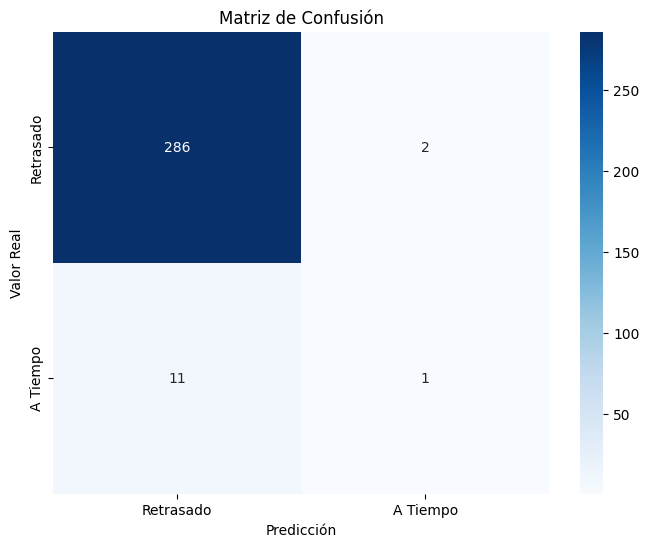


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       288
           1       0.33      0.08      0.13        12

    accuracy                           0.96       300
   macro avg       0.65      0.54      0.56       300
weighted avg       0.94      0.96      0.94       300


Predicción para el nuevo envío:
Se retrasará
Probabilidad de llegar a tiempo: 0.00%


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

def cargar_y_analizar_supply_chain():
    """
    Carga los datos desde el archivo y realiza el análisis con árbol de decisión.
    """
    # Cargamos los datos
    try:
        data = pd.read_csv("https://github.com/santiagonajera/ArbolDecision-EntregasTiempo/raw/refs/heads/main/tiempos_de_entrega.txt", sep='\t')
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar los datos: {str(e)}")
        return None, None

    # Preparamos los datos para el modelo
    X = data.drop('Entrega_A_Tiempo', axis=1)
    y = data['Entrega_A_Tiempo']

    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Escalamos las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creamos y entrenamos el árbol de decisión
    dt = DecisionTreeClassifier(max_depth=4, random_state=42)
    dt.fit(X_train_scaled, y_train)

    # Realizamos predicciones
    y_pred = dt.predict(X_test_scaled)

    # Visualizaciones
    # 1. Árbol de decisión
    plt.figure(figsize=(20, 10))
    plot_tree(dt,
              feature_names=X.columns,
              class_names=['Retrasado', 'A Tiempo'],
              filled=True,
              rounded=True)
    plt.title("Árbol de Decisión para Predicción de Entregas a Tiempo")
    plt.show()

    # 2. Importancia de características
    plt.figure(figsize=(10, 6))
    importancia = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': dt.feature_importances_
    }).sort_values('Importancia', ascending=False)

    sns.barplot(data=importancia, x='Importancia', y='Característica')
    plt.title('Importancia de las Características')
    plt.show()

    # 3. Matriz de confusión
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Retrasado', 'A Tiempo'],
                yticklabels=['Retrasado', 'A Tiempo'])
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    # Imprimimos métricas de rendimiento
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    return dt, scaler

if __name__ == "__main__":
    # Realizamos el análisis
    modelo, scaler = cargar_y_analizar_supply_chain()

    if modelo is not None and scaler is not None:
        # Ejemplo de predicción con nuevos datos
        nuevo_envio = pd.DataFrame({
            'Distancia_km': [800],
            'Tiempo_Procesamiento_hrs': [24],
            'Numero_Paradas': [2],
            'Capacidad_Utilizada': [0.75],
            'Prioridad': [2]
        })

        # Escalamos los nuevos datos
        nuevo_envio_scaled = scaler.transform(nuevo_envio)

        # Realizamos la predicción
        prediccion = modelo.predict(nuevo_envio_scaled)
        probabilidades = modelo.predict_proba(nuevo_envio_scaled)

        print("\nPredicción para el nuevo envío:")
        print("Llegará a tiempo:" if prediccion[0] == 1 else "Se retrasará")
        print(f"Probabilidad de llegar a tiempo: {probabilidades[0][1]:.2%}")